Code from [this link](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)

In [86]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, BatchNormalization, MaxPool2D
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [26]:
batch_size = 256
num_classes = 10
epochs = 20

In [3]:
img_rows, img_cols = 28, 28

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [76]:
func = K.function([model.layers[0].input], [model.layers[-2].output])

In [77]:
lrs = []

In [78]:
def lr_schedule(epoch):
    """Learning Rate Schedule
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """

    Kz = 0.
    for i in range((len(x_train) - 1) // batch_size + 1):
        start_i = i * batch_size
        end_i = start_i + batch_size
        xb = x_train[start_i:end_i]
    
        activ = np.linalg.norm(func([xb]))
        if activ > Kz:
            Kz = activ

    K_ = (9. * Kz) / (10. * batch_size)
    lr = 1 / K_
    lrs.append(lr)
    print('Epoch', epoch, 'LR =', lr)
    return lr

In [79]:
lr_scheduler = LearningRateScheduler(lr_schedule)

In [80]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

In [81]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

        # Compute quantities required for featurewise normalization
        # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [82]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

Epoch 1/20
Epoch 0 LR = 2.624125012913604
235/234 [==============================] - 20s 84ms/step - loss: 1.0442 - acc: 0.6555 - val_loss: 2.7086 - val_acc: 0.2391
Epoch 2/20
Epoch 1 LR = 2.220594486667227
235/234 [==============================] - 18s 76ms/step - loss: 0.2984 - acc: 0.9081 - val_loss: 0.3068 - val_acc: 0.8995
Epoch 3/20
Epoch 2 LR = 2.952203755569404
235/234 [==============================] - 18s 77ms/step - loss: 0.1881 - acc: 0.9422 - val_loss: 0.1045 - val_acc: 0.9673
Epoch 4/20
Epoch 3 LR = 2.5047592163804095
235/234 [==============================] - 18s 76ms/step - loss: 0.1182 - acc: 0.9641 - val_loss: 0.0781 - val_acc: 0.9777
Epoch 5/20
Epoch 4 LR = 2.3865759088157374
235/234 [==============================] - 17s 74ms/step - loss: 0.0956 - acc: 0.9709 - val_loss: 0.0350 - val_acc: 0.9895
Epoch 6/20
Epoch 5 LR = 2.1039852179917324
235/234 [==============================] - 18s 77ms/step - loss: 0.0811 - acc: 0.9756 - val_loss: 0.0244 - val_acc: 0.9925
Epoch 7

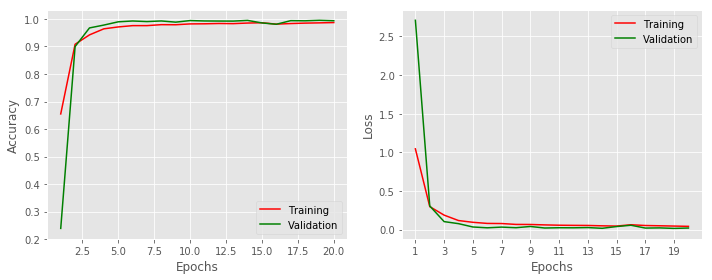

In [97]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
plt.xticks(range(1, 21, 2))

ax[0].set_ylabel('Accuracy');
ax[0].set_xlabel('Epochs');
lines = ax[0].plot(range(1, 21), model.history.history['acc'], 'r-',
                   range(1, 21), model.history.history['val_acc'], 'g-');
ax[0].legend(lines, ('Training', 'Validation'));

ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
lines = ax[1].plot(range(1, 21), model.history.history['loss'], 'r-',
                   range(1, 21), model.history.history['val_loss'], 'g-');
ax[1].legend(lines, ('Training', 'Validation'))

fig.tight_layout()

In [88]:
model.save('mnist-epoch-20.h5')

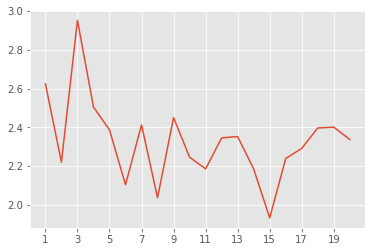

In [99]:
plt.xticks(range(1, 21, 2))
plt.plot(range(1, 21), lrs);